<a href="https://colab.research.google.com/github/juan-holguin/TAM_2025_2/blob/main/Gradiente_alpha/11_09_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt


In [2]:
N = 1000
p = 20
X, y = make_regression(n_samples=N, n_features=p, noise=1, random_state=42)
X

print(X.shape, y.shape)

(1000, 20) (1000,)


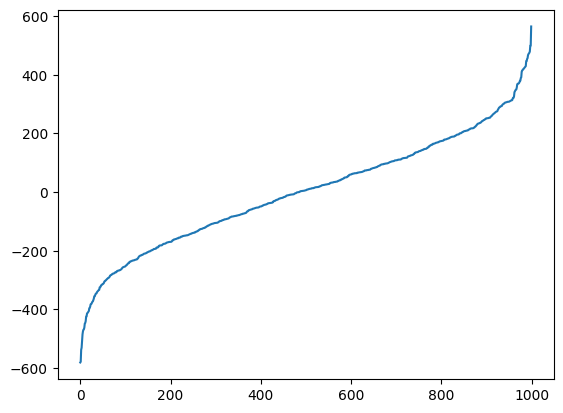

In [3]:
plt.plot(np.sort(y))
plt.show()

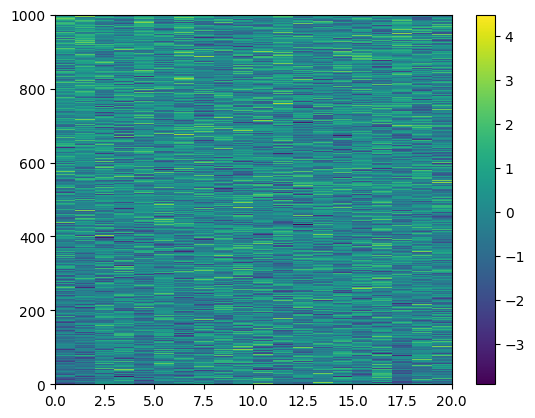

In [45]:
ind = np.argsort(y)
plt.pcolormesh(X[ind])
plt.colorbar()
plt.show()

In [46]:
def mincua_reg(x,y, lam_ = 1e-3):
  alpha = x.T.dot(x)+lam_*np.eye(x.shape[1])
  alpha = np.linalg.inv(alpha).dot(x.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

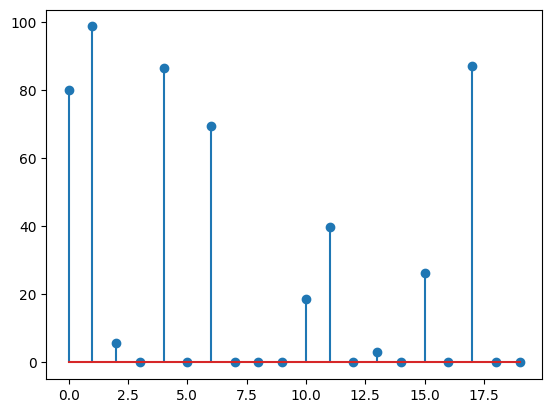

In [47]:
alpha = mincua_reg(X, y)
print(alpha)
plt.stem(np.arange(len(alpha)),(np.abs(alpha)))

In [48]:
ypred = X.dot(alpha)

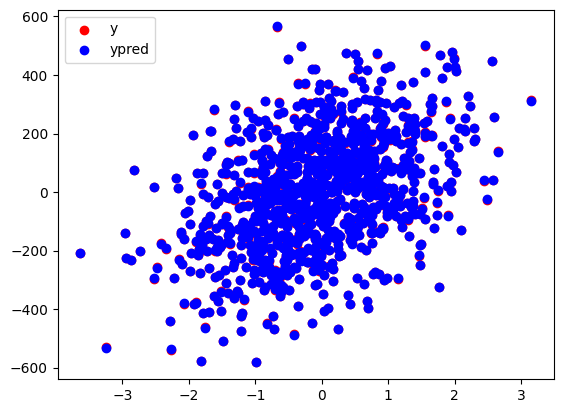

In [49]:
plt.scatter(X[ind,0],y[ind], c ='r', marker = 'o', label = 'y' )
plt.scatter(X[ind,0],ypred[ind], c = 'b', label = 'ypred')
plt.legend()
plt.show()

In [11]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


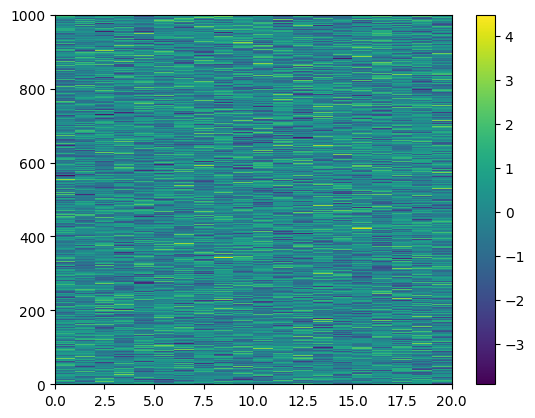

In [34]:
Xh = housing.data
yh = housing.target
plt.pcolormesh(X)
plt.colorbar()
plt.show()

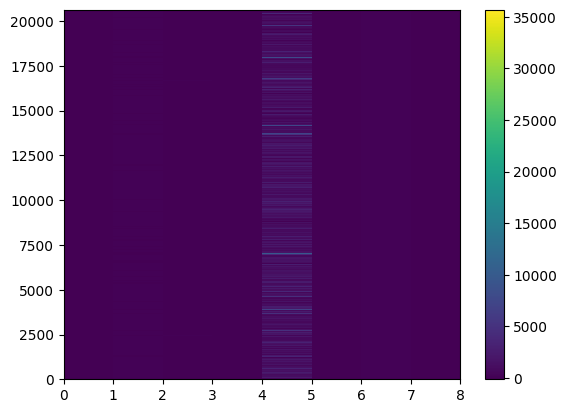

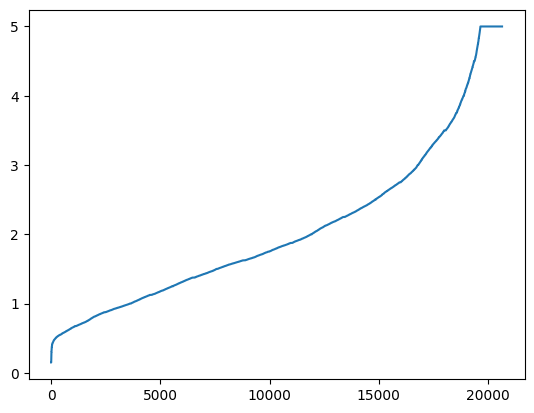

In [38]:
ind_ = np.argsort(yh)
plt.pcolormesh(Xh[ind_])
plt.colorbar()
plt.show()
plt.plot(yh[ind_])
plt.show()

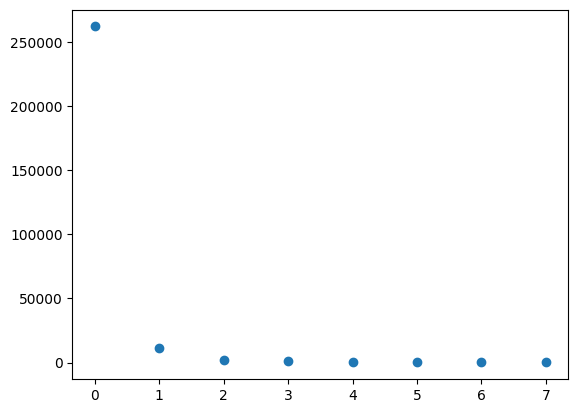

In [24]:
U,S,Vh = np.linalg.svd(Xh)
plt.scatter(np.arange(len(S)),S)
plt.show()

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


<StemContainer object of 3 artists>

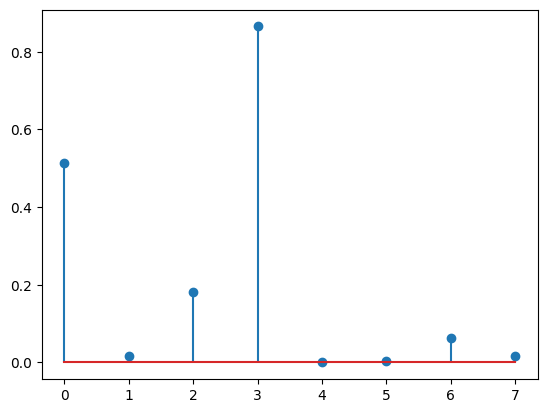

In [50]:
alpha = mincua_reg(Xh, yh)
print(alpha)
plt.stem(np.arange(len(alpha)),(np.abs(alpha)))

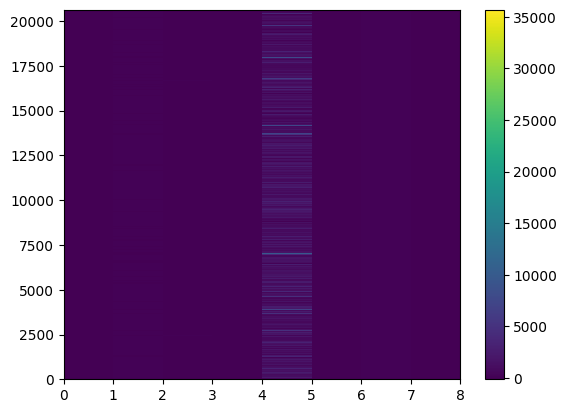

In [51]:
ind = np.argsort(yh)
plt.pcolormesh(Xh[ind])
plt.colorbar()
plt.show()

In [59]:
ypred = Xh.dot(alpha)

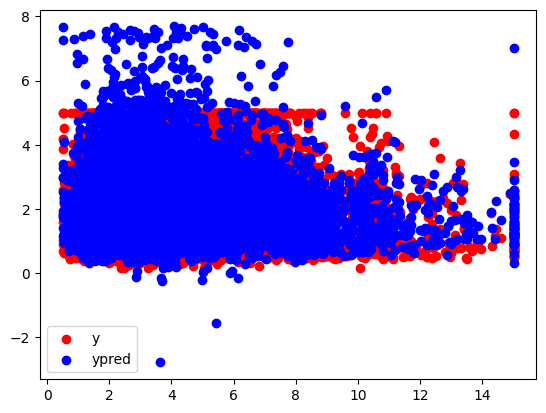

In [60]:
plt.scatter(Xh[ind_,0],yh, c ='r', marker = 'o', label = 'y' )
plt.scatter(Xh[ind_,0],ypred, c = 'b', label = 'ypred')
plt.legend()
plt.show()

In [19]:
# Datos
N = 1000
p = 20
X, y = make_regression(n_samples=N, n_features=p, noise=1, random_state=42)

# Inicializamos w como vector de ceros
w = np.zeros(p)

# Hiperparámetros
learning_rate = 0.01
n_iterations = 1000

# Guardamos la historia
w_history = [w.copy()]

# Gradiente descendente
for i in range(n_iterations):
    # Predicciones
    y_pred = X @ w   # (N x p) @ (p,) = (N,)

    # Gradiente del MSE
    gradient = -(2/N) * X.T @ (y - y_pred)

    # Actualizamos w
    w -= learning_rate * gradient

    w_history.append(w.copy())

print("Vector de pesos optimizado:", w)
print("Dimensión de w:", w.shape)

Vector de pesos optimizado: [ 8.00000048e+01  9.86016925e+01  5.57286769e+00  2.41718519e-02
  8.64705179e+01 -3.94558709e-02  6.94412579e+01 -3.56298416e-03
  2.38674663e-02 -3.12144201e-02  1.86214799e+01  3.96564641e+01
  4.91761759e-03  3.10940113e+00 -4.42052647e-02  2.63860549e+01
 -2.41890611e-02  8.68972525e+01  3.51228321e-02  1.62235812e-02]
Dimensión de w: (20,)
